# Breast Cancer Prediction

## Data description: 
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Attribute Information:
1) ID number
   
2) Diagnosis (M = malignant, B = benign)
   
3) (3-32) Ten real-valued features are computed for each cell nucleus:
   
        a) radius (mean of distances from center to points on the perimeter)
        b) texture (standard deviation of gray-scale values)
        c) perimeter
        d) area
        e) smoothness (local variation in radius lengths)
        f) compactness (perimeter^2 / area - 1.0)
        g) concavity (severity of concave portions of the contour)
        h) concave points (number of concave portions of the contour)
        i) symmetry
        j) fractal dimension ("coastline approximation" - 1)


Data Source: [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

## Overview: 
The goal is to predict whether a tumor is benign or malignant based on the features of the breast mass. In order to predict this, we will implement several Machine Learning algorithms, evaluate their performance, and compare the results. We will then use the best performing model to predict the diagnosis of a new tumor.

Steps: 
1. Data Exploration: 
   1. Data description
   2. Data visualizaton
2. Data Preprocessing:
   1. Data cleaning
   2. Data transformation
3. Machine Learning Models:
   1. K-Nearest Neighbors
   2. Support Vector Machine
   3. Decision Tree
   4. Logistic Regression
   5. Artificial Neural Network
4. Model Evaluation
5. Conclusions
6. Demo


### 0: Importing libraries

In [103]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

### 1: Data Exploration

#### 1a. Data description

In [104]:
# import dataset using pandas
data = pd.read_csv('datasets/wisconsin/data.csv')
# preview the dataset
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [105]:
# Column names 
col_names = data.columns.to_list()
print(col_names)

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [106]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


####  1b. Data visualizaton

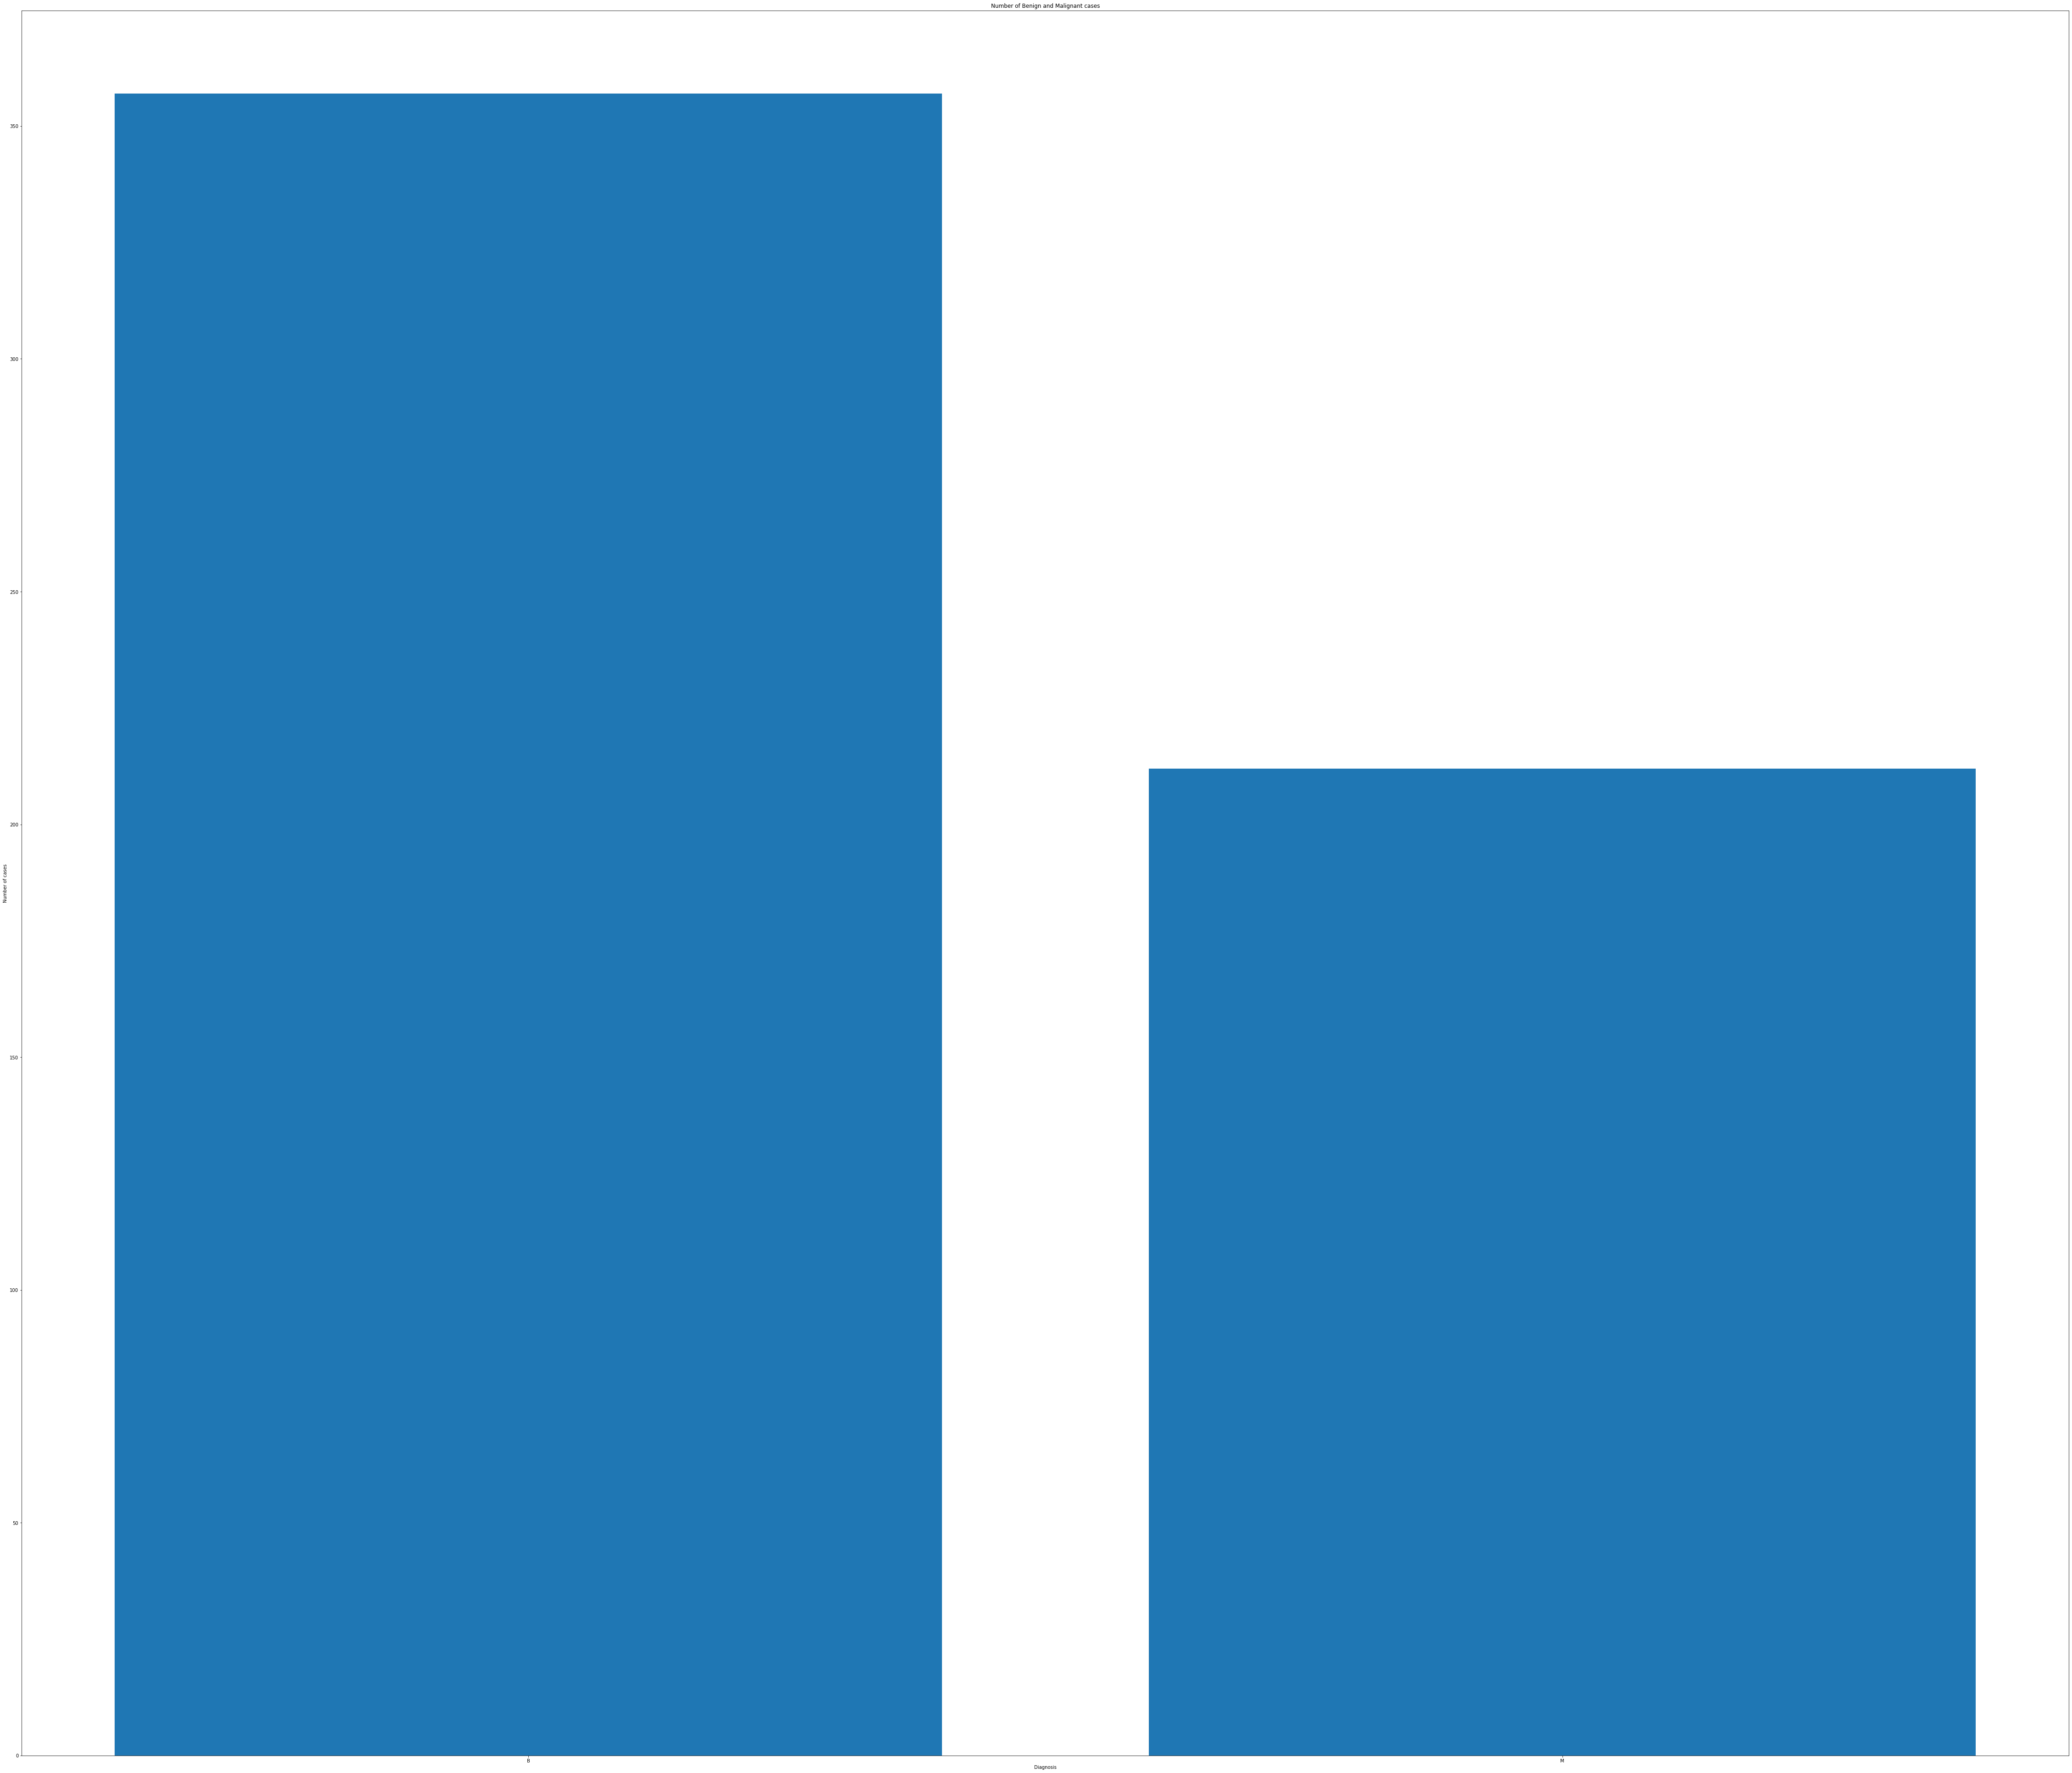

In [107]:
# Plot number of Benign and Malignant cases
diagnosis = data.groupby('diagnosis').size()
plt.bar(diagnosis.index, diagnosis)
plt.title('Number of Benign and Malignant cases')
plt.xlabel('Diagnosis')
plt.ylabel('Number of cases')
plt.show()

### 2: Data Preprocessing

#### 2a. Data Cleaning

In [108]:
# First we will check for missing values in the data
missing_val_count = data.isnull().sum().sum()
print("Total missing values: ", missing_val_count)

Total missing values:  0


In [109]:
# Since there are no missing values, we can proceed with removing any unnecessary columns
# The ID column is unnecessary to us, so we will drop it
if 'id' in data.columns:
    data.drop('id', axis=1, inplace=True)
    # drop id from col_names list 
    col_names.remove('id')

# preview the updated dataset
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### 2b. Data Transformation

In [110]:
# Convert the diagnosis column to binary values: Benign = 0, Malignant = 1 
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [111]:
# Now back to visualization, we can see the correlation matrix to see if there are any strong correlations between the features
corr_matrix = data.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [112]:
# Determine which features are most correlated with the diagnosis
corr_matrix['diagnosis'].sort_values(ascending=False).head(10)

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
Name: diagnosis, dtype: float64

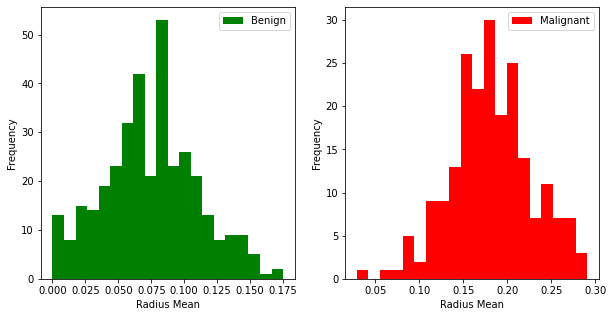

In [113]:
# Split the data into benign and malignant sets
benign_data = data[data['diagnosis'] == 0]
malignant_data = data[data['diagnosis'] == 1]

# Plot the distribution of the data of the highest correlated feature
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.hist(benign_data['concave points_worst'], bins=20, color='green', label='Benign')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(122)
plt.hist(malignant_data['concave points_worst'], bins=20, color='red', label='Malignant')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [114]:

# Split the data into features and target
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']


In [115]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [116]:
# Then we will normalize our data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train , columns=col_names[1:])
X_test = pd.DataFrame(X_test , columns=col_names[1:])


print("X_train shape: ", X_train.shape) 
print("X_test shape: ", X_test.shape)

X_train shape:  (398, 30)
X_test shape:  (171, 30)


### 3: Machine Learning Models
In step 2 we have cleaned, scaled, and split our data. Now we will perform several Machine Learning algorithms on our data and store their performance metrics.

#### 3a. K-Nearest Neighbors
KNN is a simple supervised learning algorithm that can be used to classify data points based on the similarity of their attributes. 

In [117]:
# store model accuracies into a dictionary
model_accuracies = {}

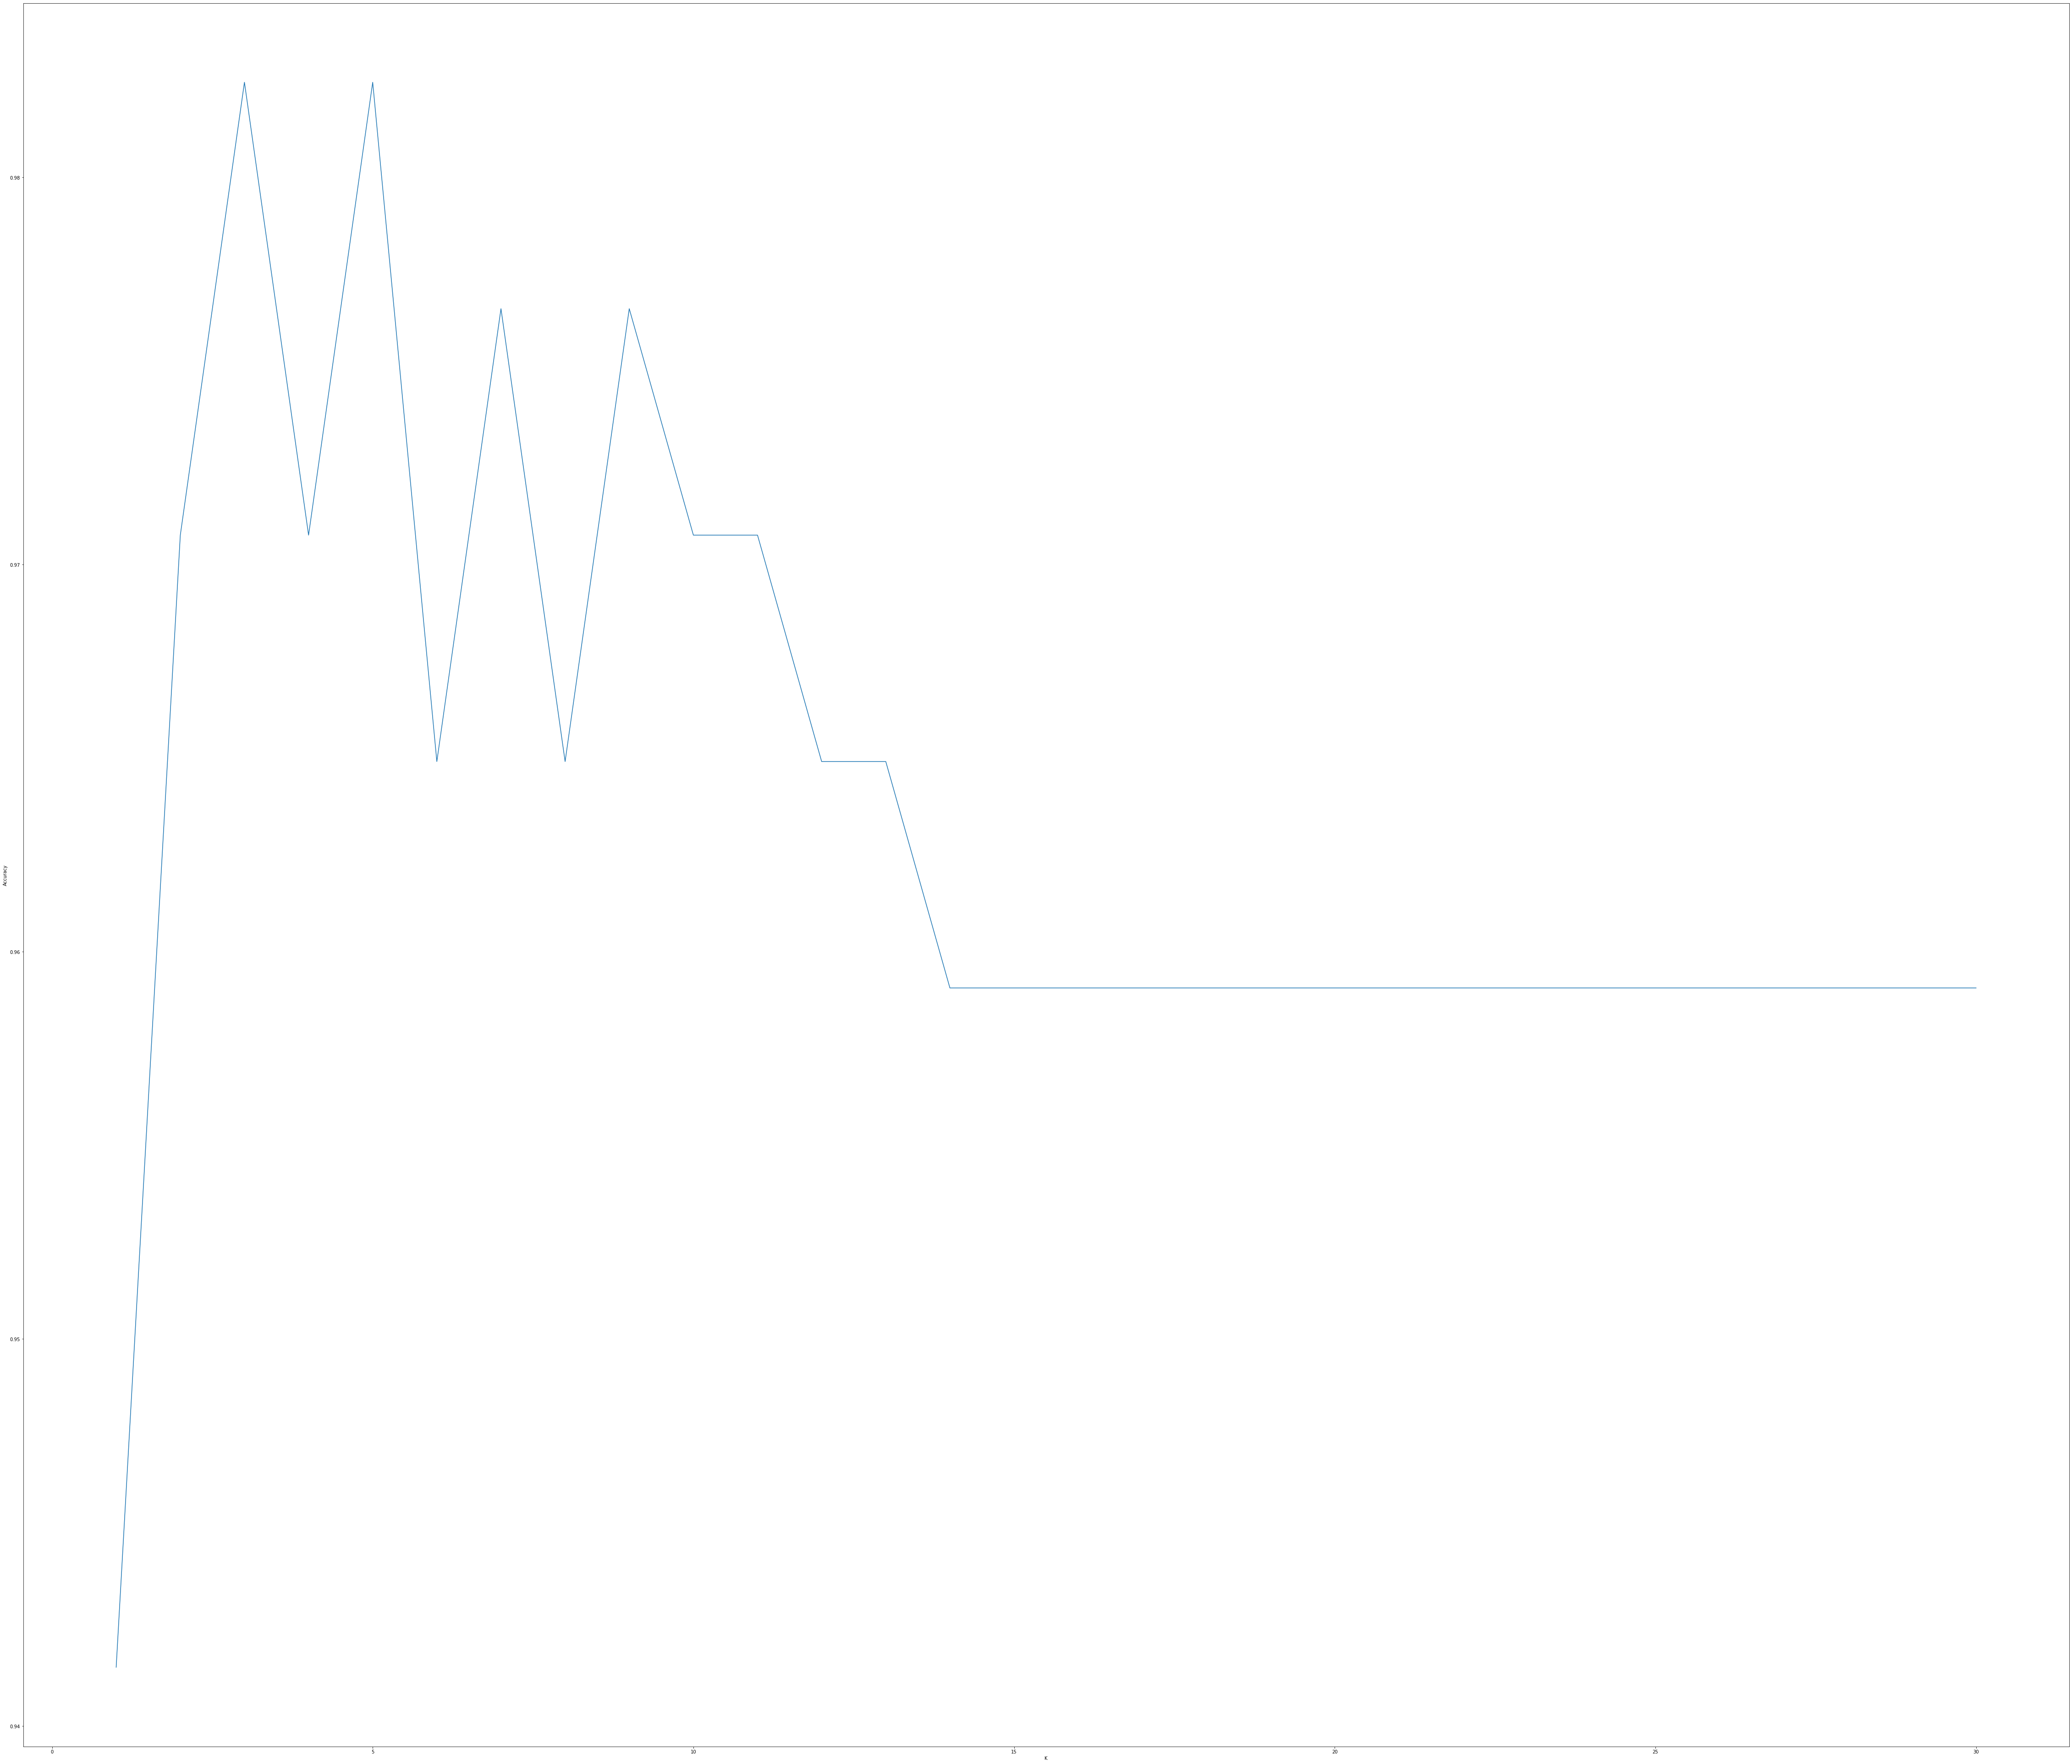

Best K =  3  Highest Accuracy =  0.9824561403508771
KNN accuracy:  0.9824561403508771
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       104
           1       1.00      0.90      0.94        67

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [118]:
# We will compare the accuracy of KNN with different values of K, and plot the results
k_vals = range(1, 31) # range of K values to test
accuracies = [] # list to store accuracy values
highest_accuracy = 0 # initialize highest accuracy
best_k = 0 # initialize best k
for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_k = k
# plot the results
plt.plot(k_vals, accuracies)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()
# print the best k value
print("Best K = ", best_k, " Highest Accuracy = ", highest_accuracy)
# Store KNN accuracy
knn_accuracy = highest_accuracy
# append KNN accuracy to model_accuracies dictionary
model_accuracies['KNN'] = knn_accuracy
print("KNN accuracy: ", knn_accuracy)
# print classification report 
print(classification_report(y_test, y_pred))

#### 3b. Support Vector Machine
SVM is a supervised learning algorithm that can be used to classify data points based on the linear decision boundary of the data points.

Accuracy for kernel:  linear  is:  0.9707602339181286
Accuracy for kernel:  poly  is:  0.8947368421052632
Accuracy for kernel:  rbf  is:  0.9766081871345029
Accuracy for kernel:  sigmoid  is:  0.9532163742690059


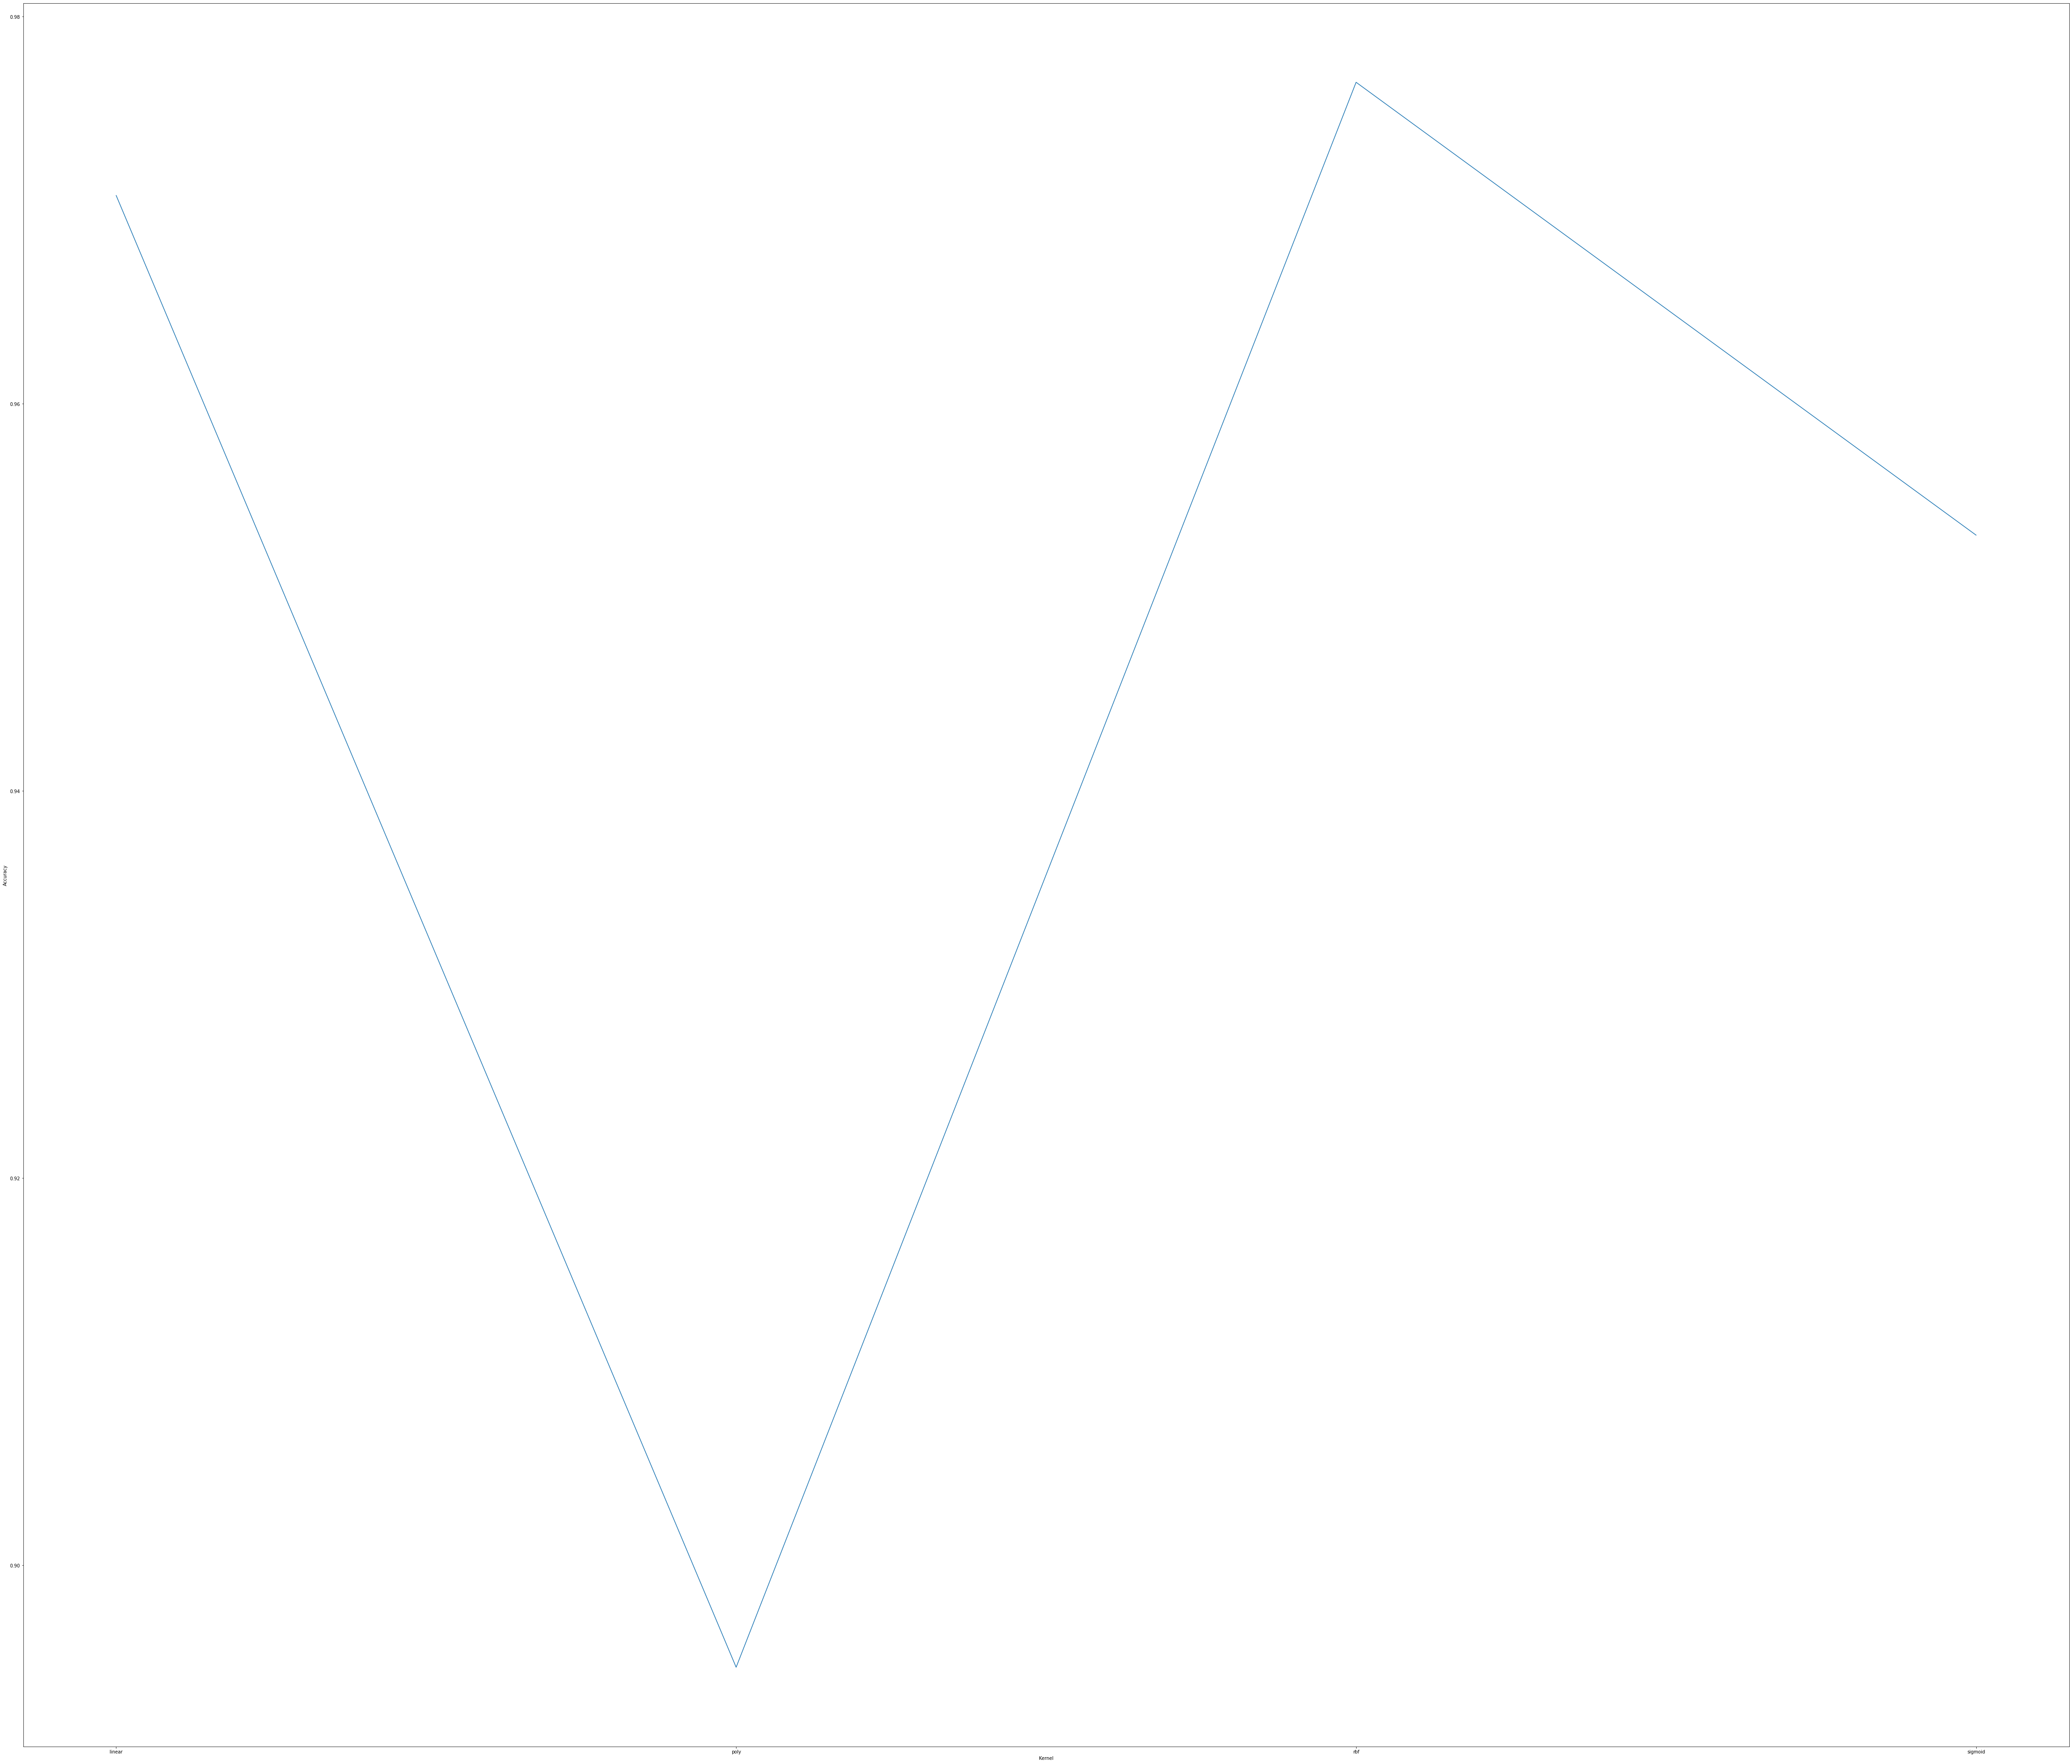

Best Kernel =  rbf  Highest Accuracy =  0.9766081871345029
SVM accuracy:  0.9766081871345029
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       104
           1       0.97      0.91      0.94        67

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [119]:
# We will compare the accuracy of SVM with different values of the kernel, and plot the results
kernel_vals = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []
highest_accuracy = 0
best_kernel = ''
for kernel in kernel_vals:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_kernel = kernel
    print("Accuracy for kernel: ", kernel, " is: ", accuracy)

# plot the results
plt.plot(kernel_vals, accuracies)
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.show()
print("Best Kernel = ", best_kernel, " Highest Accuracy = ", highest_accuracy)
# Store SVM accuracy
svm_accuracy = highest_accuracy
# append SVM accuracy to model_accuracies dictionary
model_accuracies['SVM'] = svm_accuracy
print("SVM accuracy: ", svm_accuracy)
# print classification report
print(classification_report(y_test, y_pred))

#### 3c. Decision Tree
Decision trees are a supervised learning algorithm that can be used to classify data points based on the decisions made by the tree.

Decision Tree accuracy:  0.9298245614035088
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       104
           1       0.87      0.97      0.92        67

    accuracy                           0.93       171
   macro avg       0.92      0.94      0.93       171
weighted avg       0.94      0.93      0.93       171



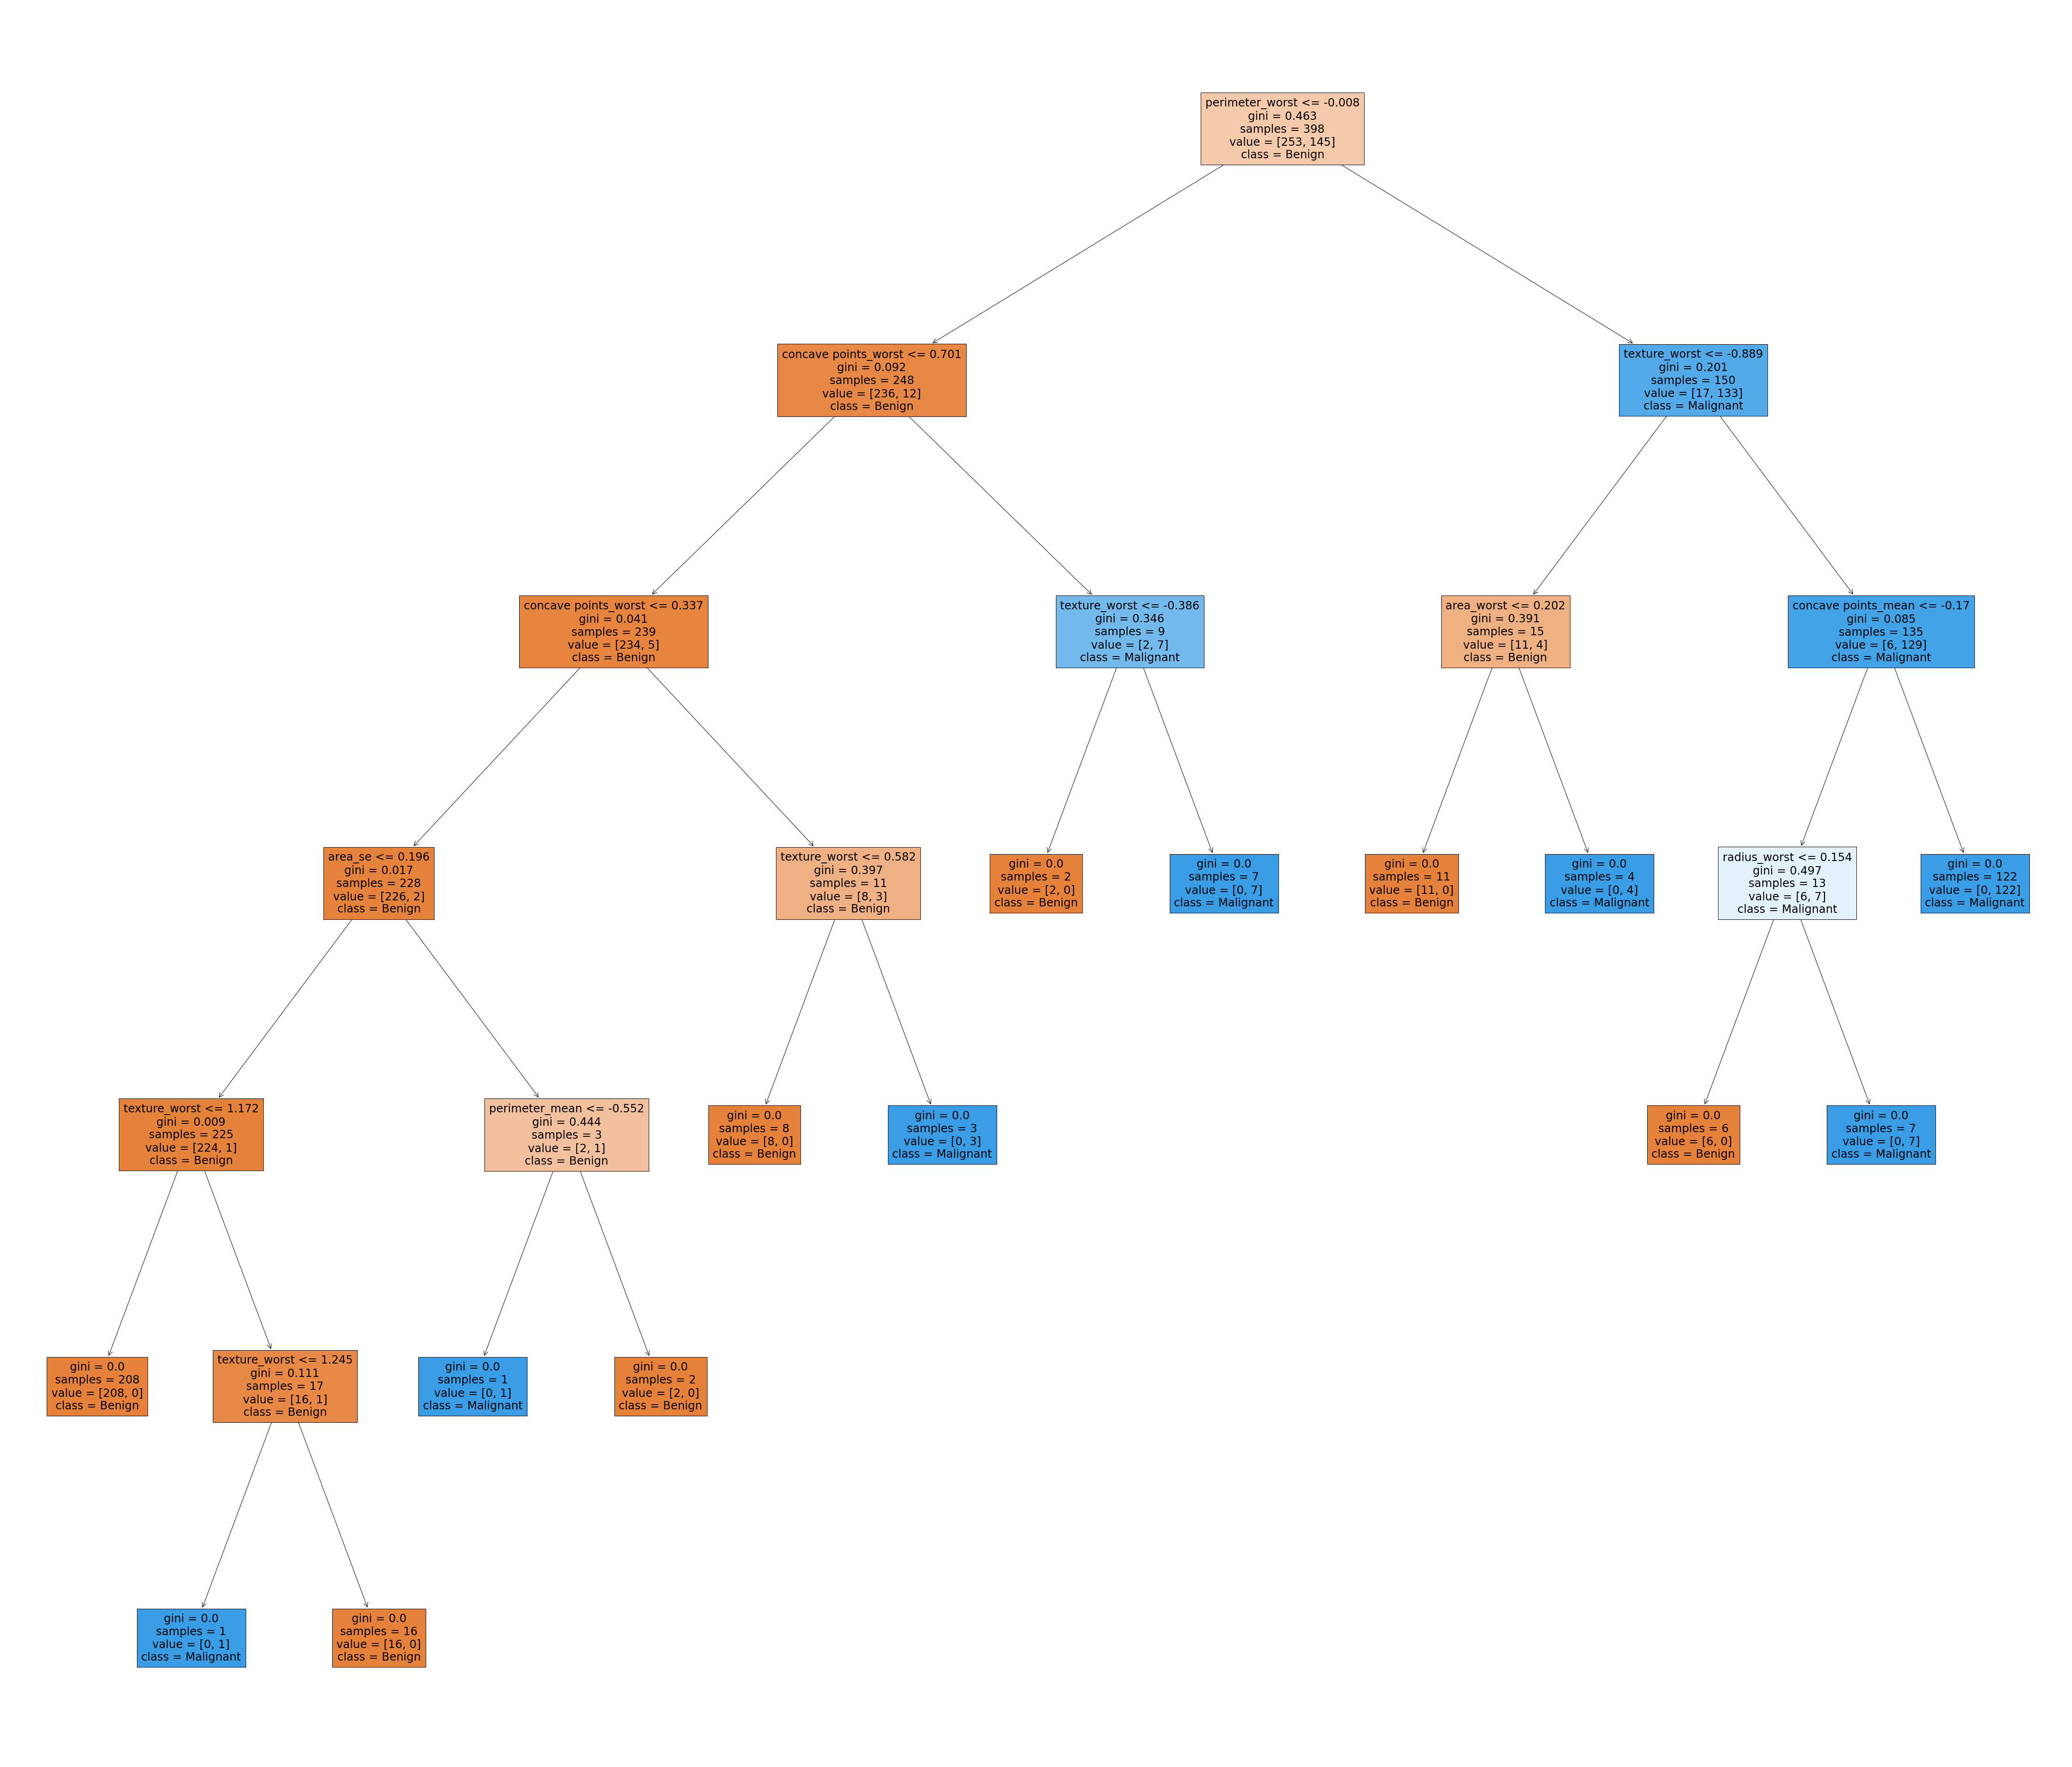

<Figure size 1440x720 with 0 Axes>

In [132]:
decisiontree = DecisionTreeClassifier()

decisiontree.fit(X_train, y_train)
y_pred = decisiontree.predict(X_test)
decisiontree_accuracy = accuracy_score(y_test, y_pred)
# store decision tree accuracy
model_accuracies['Decision Tree'] = decisiontree_accuracy
# plotting the tree with the column names
tree.plot_tree(decisiontree, feature_names=col_names[1:], class_names=['Benign', 'Malignant'], filled=True)
# increase the size of the plot
print("Decision Tree accuracy: ", decisiontree_accuracy)
# print classification report
print(classification_report(y_test, y_pred))

#### 3d. Logistic Regression
Logistic regression is a process of modeling the probability of a discrete outcome given an input variable

In [121]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred)
# store logistic regression accuracy
model_accuracies['Logistic Regression'] = lr_accuracy
print("Logistic Regression accuracy: ", lr_accuracy)
# print classification report
print(classification_report(y_test, y_pred))

Logistic Regression accuracy:  0.9707602339181286
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       104
           1       0.96      0.97      0.96        67

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



#### 3e. Artificial Neural Network
ANN seeks to classify an observation as belonging to some discrete class as a function of the inputs.

In [122]:
ann = MLPClassifier()
ann.fit(X_train, y_train)
y_pred = ann.predict(X_test)
ann_accuracy = accuracy_score(y_test, y_pred)
# store ANN accuracy
model_accuracies['ANN'] = ann_accuracy
print("Artificial Neural Network accuracy: ", ann_accuracy)
# print classification report
print(classification_report(y_test, y_pred))

Artificial Neural Network accuracy:  0.9590643274853801
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       104
           1       0.93      0.97      0.95        67

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



## 4. Model Evaluation

In [123]:
# print the model accuracies
for key, value in model_accuracies.items():
    print(key,":", round(value, 3))

KNN : 0.982
SVM : 0.977
Decision Tree : 0.93
Logistic Regression : 0.971
ANN : 0.959


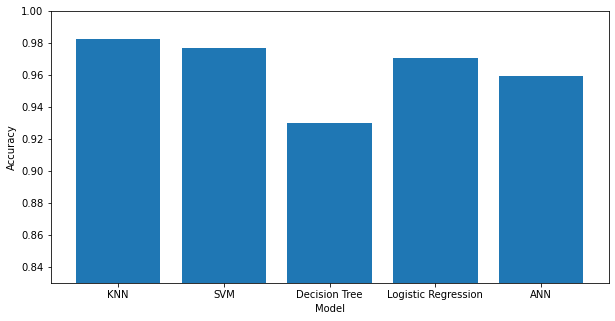

In [124]:
# plotting the accuracies
plt.figure(figsize=(10, 5)) # change plot size
plt.bar(model_accuracies.keys(), model_accuracies.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(min(model_accuracies.values()) - 0.1, 1) # change y scale to min value in model_accuracies
plt.show()

## Conclusions
By comparing the performance of the different algorithms, we can see that all models performed well, each having over 90% accuracy. However, the best performing model is the K-Nearest Neighbors with an accuracy of 98.2%.

## Demo

In [125]:
# Split the data into benign and malignant sets
benign_data = data[data['diagnosis'] == 0]
malignant_data = data[data['diagnosis'] == 1]

# Pick a random sample from each set
benign_sample = benign_data.sample(n=1)
malignant_sample = malignant_data.sample(n=1)

# drop the diagnosis column
benign_sample = benign_sample.drop('diagnosis', axis=1)
malignant_sample = malignant_sample.drop('diagnosis', axis=1)

# scale the data
benign_sample = scaler.transform(benign_sample)
malignant_sample = scaler.transform(malignant_sample)

# convert back to dataframe
benign_sample = pd.DataFrame(benign_sample, columns=data.columns[1:])
malignant_sample = pd.DataFrame(malignant_sample, columns=data.columns[1:])

In [126]:
benign_sample

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.249584,-0.447405,-0.310648,-0.310638,-1.648509,-1.131575,-0.573286,-0.98295,-1.196308,-0.906164,...,-0.475497,0.317614,-0.563247,-0.484615,-0.95138,-0.671619,-0.211845,-0.993906,-0.208098,-0.662474


In [127]:
malignant_sample

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.50403,1.681312,-0.438583,-0.504755,0.545158,0.624601,0.283894,-0.048185,0.534469,0.940867,...,-0.102519,2.179775,-0.141433,-0.168598,2.027445,1.409225,0.807028,0.505788,0.553572,1.993094


In [128]:
# Predict the diagnosis for the random samples using the best model: KNN
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [129]:
# classes
classes =  {0: 'benign', 1: 'malignant'}

In [130]:
# Prediction for the benign sample
y_pred_b= knn.predict(benign_sample)
print("Prediction for the benign sample: ", classes[y_pred_b[0]])


Prediction for the benign sample:  benign


In [131]:
y_pred_m = knn.predict(malignant_sample)
print("Prediction for the malignant sample: ", classes[y_pred_m[0]])

Prediction for the malignant sample:  malignant
